# Defining the problem

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [26]:
df = pd.read_csv('module2-wrangle-ml-datasets/MACH_data/data.csv', sep='\t')

In [27]:
df.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screenw,screenh,hand,religion,orientation,race,voted,married,familysize,major
0,3.0,6.0,21017.0,3.0,7.0,18600.0,5.0,20.0,14957.0,2.0,...,1440.0,900.0,1,7,1,30,1,2,5,Marketing
1,5.0,17.0,3818.0,5.0,9.0,7850.0,1.0,16.0,5902.0,3.0,...,1536.0,864.0,1,1,1,60,2,1,2,mathematics
2,5.0,16.0,4186.0,5.0,12.0,2900.0,1.0,2.0,7160.0,1.0,...,375.0,667.0,1,2,2,10,2,1,2,Chemistry
3,2.0,12.0,9373.0,4.0,1.0,10171.0,2.0,7.0,10117.0,1.0,...,1280.0,720.0,1,6,1,60,1,3,2,international relations
4,5.0,13.0,9465.0,5.0,7.0,5284.0,2.0,19.0,8872.0,1.0,...,360.0,640.0,1,4,3,60,1,1,2,Management


In [28]:
print(df.columns.tolist())

['Q1A', 'Q1I', 'Q1E', 'Q2A', 'Q2I', 'Q2E', 'Q3A', 'Q3I', 'Q3E', 'Q4A', 'Q4I', 'Q4E', 'Q5A', 'Q5I', 'Q5E', 'Q6A', 'Q6I', 'Q6E', 'Q7A', 'Q7I', 'Q7E', 'Q8A', 'Q8I', 'Q8E', 'Q9A', 'Q9I', 'Q9E', 'Q10A', 'Q10I', 'Q10E', 'Q11A', 'Q11I', 'Q11E', 'Q12A', 'Q12I', 'Q12E', 'Q13A', 'Q13I', 'Q13E', 'Q14A', 'Q14I', 'Q14E', 'Q15A', 'Q15I', 'Q15E', 'Q16A', 'Q16I', 'Q16E', 'Q17A', 'Q17I', 'Q17E', 'Q18A', 'Q18I', 'Q18E', 'Q19A', 'Q19I', 'Q19E', 'Q20A', 'Q20I', 'Q20E', 'country', 'introelapse', 'testelapse', 'surveyelapse', 'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10', 'VCL1', 'VCL2', 'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10', 'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16', 'education', 'urban', 'gender', 'engnat', 'age', 'screenw', 'screenh', 'hand', 'religion', 'orientation', 'race', 'voted', 'married', 'familysize', 'major']


### Information about each feature

In [29]:
# main body consisted of 20 quesitons
question = {
    "Q1" : "Never tell anyone the real reason you did something unless it is useful to do so.",
    "Q2" : "The best way to handle people is to tell them what they want to hear.",
    "Q3" : "One should take action only when sure it is morally right.",
    "Q4" : "Most people are basically good and kind.",
    "Q5" : "It is safest to assume that all people have a vicious streak and it will come out when they are given a chance.",
    "Q6" : "Honesty is the best policy in all cases.",
    "Q7" : "There is no excuse for lying to someone else.",
    "Q8" : "Generally speaking, people won't work hard unless they're forced to do so.",
    "Q9" : "All in all, it is better to be humble and honest than to be important and dishonest.",
    "Q10" : "When you ask someone to do something for you, it is best to give the real reasons for wanting it rather than giving reasons which carry more weight.",
    "Q11" : "Most people who get ahead in the world lead clean, moral lives.",
    "Q12" : "Anyone who completely trusts anyone else is asking for trouble.",
    "Q13" : "The biggest difference between most criminals and other people is that the criminals are stupid enough to get caught.",
    "Q14" : "Most people are brave.",
    "Q15" : "It is wise to flatter important people.",
    "Q16" : "It is possible to be good in all respects.",
    "Q17" : "P.T. Barnum was wrong when he said that there's a sucker born every minute.",
    "Q18" : "It is hard to get ahead without cutting corners here and there.",
    "Q19" : "People suffering from incurable diseases should have the choice of being put painlessly to death.",
    "Q20" : "Most people forget more easily the death of their parents than the loss of their property."
    }

# possible answers were represented on a 5 point scale
Q_scale = {
    1:'Disagree', 
    2:'Slightly disagree', 
    3:'Neutral', 
    4:'Slightly agree', 
    5:'Agree'
}

# A = answer
# I = position of item it was in the survey
# E = time spent on question in milliseconds


# this data only consists of people who choose to answer
# these next questions...
# brief measure of big five personality domains

personality_inventory = {
    'TIPI1': 'extraverted_enthusiastic', 
    'TIPI2': 'critical_quarrelsome', 
    'TIPI3': 'dependable_selfdisciplined', 
    'TIPI4': 'anxious_easily_upset', 
    'TIPI5':'open_to_new_experiences_complex', 
    'TIPI6': 'reserved_quiet', 
    'TIPI7': 'sympathetic_warm', 
    'TIPI8':'disorganized_careless', 
    'TIPI9':'calm_emotionally_stable',
    'TIP10': 'conventional_uncreative'
}

# rated "I see myself as:" _______ such that
TIP_rating_scale = {
    1:'Disagree strongly',
    2: 'Disagree moderately',
    3: 'Disagree a little',
    4:'Neither agree nor disagree',
    5:'Agree a little',
    6:'Agree moderately',
    7:'Agree strongly'
}


# these words were presentted as a check-list and subjects were instructed
# to check all of thte words whose definitions they are sure they know:
# 1 = checked
# 0 = unchecked
# words at VCL6, VCL9, and VCL12 are not real words

known_words= {
    'VCL1':'boat',
    'VCL2':'incoherent',
    'VCL3':'pallid',
    'VCL4':'robot',
    'VCL5':'audible',
    'VCL6':'cuivocal_fale',
    'VCL7':'paucity',
    'VCL8':'epistemology',
    'VCL9':'florted_fake',
    'VCL10':'decide',
    'VCL11':'pastiche',
    'VCL12':'verdid_fake',
    'VCL13':'abysmal',
    'VCL14':'lucid',
    'VCL15':'betray',
    'VCL16':'funny'
}


# more questions that were asked...

education_level = {
    1:'Less than high school', 
    2:'High school', 
    3:'University degree', 
    4:'Graduate degree'
}

area_lived_when_child = {
    1:'Rural (country side)', 
    2:'Suburban', 
    3:'Urban (town, city)'
}

gender = {
    1:'Male',
    2:'Female',
    3:'Other'
}

english_native_language = {
    1:'Yes',
    2:'No'
}

dominant_hand = {
    1:'Right',
    2:'Left',
    0:'Both'
}

religion = {
    0:'Unchecked',
    1:'Agnostic',
    2:'Atheist',
    3:'Buddhist',
    4:'Christian (Catholic)',
    5:'Christian (Mormon)',
    6:'Christian (Protestant)',
    7:'Christian (Other)',
    8:'Hindu',
    9:'Jewish',
    10:'Muslim',
    11:'Sikh',
    12:'Other'
}

sexual_orientation = {
    1:'Heterosexual',
    2:'Bisexual', 
    3:'Homosexual', 
    4:'Asexual', 
    5:'Other'
}

race = {
    10:'Asian',
    20:'Arab', 
    30:'Black',
    40:'Indigenous Australian',
    50:'Native American', 
    60:'White',
    70:'Other'
}

voted_past_year = {
    1:'yes',
    2:'no'
}

marital_status = {
    1:'Never married', 
    2:'Currently married', 
    3:'Previously married'
}

# country, screenw, screenh were calculated by server. 
# we don't care about that. (maybe country)

# time spent on each page was recorded in seconds
# introelapse
# testelapse
# surveyelapse

##### Chosen target = Religion

This is a classification problem

In [30]:
df['religion'].value_counts(normalize=True)

2     0.234539
1     0.205663
4     0.135789
7     0.106560
12    0.101553
6     0.096817
10    0.034563
8     0.027855
3     0.020493
0     0.015485
9     0.010260
5     0.008178
11    0.002245
Name: religion, dtype: float64

The classes are pretty imbalanced with a very low number being Sikh and Mormon. I wanted to find a way to cluster groups together. My overall goal was to be able to find a way to cluster specific groups together, but I have not been successful in doing that so far. Instead, to get better class balance, I grouped together Atheist and Agnostic, and all of the other religions.

In [31]:
# splitting up data as soon as possible so that I am not training my model

# train and test
train, test = train_test_split(df, test_size= .2, random_state=42, stratify=df['religion'])

In [32]:
# train and val
train, val = train_test_split(train, test_size= .2, random_state=42, stratify=train['religion'])

In [33]:
def wrangle(X):
    
    wrangled = X.copy()
    
    # looks like all of the NaNs are together....
    #drop these rows 
    wrangled = wrangled.dropna(thresh=45)
    
    # drop user's screen width bc that information isn't helpful
    wrangled = wrangled.drop(columns=['screenw', 'screenh'])
    
    # drop unckecked values
    wrangled = wrangled[wrangled['education'] != 0]
    wrangled = wrangled[wrangled['gender'] != 0]
    
    # get rid of columns that mark the position the question was in the survey
    positions = []
    for x in range(1,21):
        positions.append(f'Q{x}I')
    wrangled = wrangled.drop(columns=positions)
    
    # replace 'NONE' in country with NaN... not sure why
    wrangled['country'] = wrangled['country'].replace(np.NaN,'NONE')
    # I have a feeling something is different here... so I might want to take 
    # a look at the answers that have a country of null vs NaN
    
    # make all majors have same casing
    wrangled['major'] = wrangled['major'].str.lower()
    wrangled['major'] = wrangled['major'].replace('none', 'NONE')
    wrangled['major'] = wrangled['major'].replace(np.NaN, 'NONE')
    
    wrangled = wrangled.dropna(subset=['introelapse'])
    
    # drop zeros and others to just focus in on the main choices...
    # make new column with true or false values of whether a person is religious or not...
    wrangled = wrangled[(wrangled['religion'] != 0) & (wrangled['religion'] != 12)] 
    
    # create new column 'religious' if not agnostic or atheist
    wrangled['religious'] = wrangled['religion'] > 2
    
    # make new column with number of fake words the person said they 'for sure' recognized
    wrangled['num_fake_words'] = wrangled['VCL6'] + wrangled['VCL9'] + wrangled['VCL12']
    
    wrangled['religion'] = wrangled['religion'].replace({
                                                        0:'Unchecked',
                                                        1:'Agnostic', 
                                                        2:'Atheist',
                                                        3:'Buddhist',
                                                        4:'Christian (Catholic)',
                                                        5:'Christian (Mormon)',
                                                        6:'Christian (Protestant)',
                                                        7:'Christian (Other)',
                                                        8:'Hindu',
                                                        9:'Jewish',
                                                        10:'Muslim',
                                                        11:'Sikh',
                                                        })
    
    wrangled = wrangled[wrangled['religion']!='Unchecked']
    wrangled = wrangled[wrangled['religion']!='Other']
    
    # take out bottom quartile of people who spent less than half a second on the questions
    time = []
    for x in range(1,21):
        column = f'Q{x}E'
        time.append(column)
        wrangled = wrangled[wrangled[column] > 500]
        
    #drop the time columns
    wrangled = wrangled.drop(columns=time)                                                                                            
    
    return wrangled

train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

In [34]:
# look at just a subset of questions... 

def selected(X):
    quest = X.copy()
    quest = X.loc[:,:'Q20A']
    quest['religion'] = X['religion']
    quest['religious'] = X['religious']
    quest['education'] = X['education']
    quest['gender'] = X['gender']
    quest['personality1'] = X['TIPI1']
    quest['personality2'] = X['TIPI2']
    quest['personality3'] = X['TIPI3']
    quest['personality4'] = X['TIPI4']
    quest['personality5'] = X['TIPI5']
    quest['personality6'] = X['TIPI6']
    quest['personality7'] = X['TIPI7']
    quest['personality8'] = X['TIPI8']
    quest['personality9'] = X['TIPI9']
    quest['personality10'] = X['TIPI10']
    
    
    return quest

train_selected = selected(train)
val_selected = selected(val)
test_selected = selected(test)

#### Baseline

very balanced classes!!

Our baseline is 50%. If we were to guess that someone is religious every time, we would be correct 50.01% of the time

In [9]:
train_selected['religious'].value_counts(normalize=True)

True     0.500123
False    0.499877
Name: religious, dtype: float64

In [11]:
# define target
target = 'religious'

# drop target and leakage features 
train_features = train_selected.drop(columns=[target, 'religion'])
features_questions = train_features.columns.tolist()

In [12]:
# arrange data into X features matrix and y target vector

# training data
X_train = train_selected[features_questions]
y_train = train_selected[target]

# validation data
X_val = val_selected[features_questions]
y_val = val_selected[target]

# testing data
X_test = test_selected[features_questions]
y_test = test_selected[target]

### Logistic Regression

In [165]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegressionCV

lg = LogisticRegressionCV()
lg.fit(X_train, y_train)
y_pred = lg.predict(X_val)
accuracy_score(y_val, y_pred)

/Users/kellischeuble/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.666601120833743

### XGBoost

In [188]:
from xgboost import XGBClassifier


model4 = XGBClassifier(
    n_estimators=1000, # <= 1000 trees, depend on early stopping
    max_depth=7,       # try deeper trees because of high cardinality categoricals
    learning_rate=0.5, # try higher learning rate
    n_jobs=-1
)

eval_set = [(X_train, y_train),
           (X_val, y_val)]

model4.fit(X_train, y_train,
          eval_set=eval_set,
          eval_metric='error',
          early_stopping_rounds=50)

[0]	validation_0-error:0.330334	validation_1-error:0.353751
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 50 rounds.
[1]	validation_0-error:0.319961	validation_1-error:0.349621
[2]	validation_0-error:0.309907	validation_1-error:0.340183
[3]	validation_0-error:0.305482	validation_1-error:0.341068
[4]	validation_0-error:0.300836	validation_1-error:0.338905
[5]	validation_0-error:0.295034	validation_1-error:0.33625
[6]	validation_0-error:0.291077	validation_1-error:0.33743
[7]	validation_0-error:0.285472	validation_1-error:0.339593
[8]	validation_0-error:0.282596	validation_1-error:0.337135
[9]	validation_0-error:0.278564	validation_1-error:0.334972
[10]	validation_0-error:0.27559	validation_1-error:0.335562
[11]	validation_0-error:0.271288	validation_1-error:0.33684
[12]	validation_0-error:0.266298	validation_1-error:0.337233
[13]	validation_0-error:0.263643	validation_1-error:0.336545

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [189]:
print('Train Accuracy', model4.score(X_train, y_train))
print('Validation Accuracy', model4.score(X_val, y_val))

Train Accuracy 0.7214355948869223
Validation Accuracy 0.6650280208435748


66% is much higher than baseline... let's see if we can get it higher

### Random Forest Classifier

In [15]:
# try a random forest classifier

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, max_depth=14)  

model.fit(X_train, y_train)
print('Train Accuracy', model.score(X_train, y_train))
print('Validation Accuracy', model.score(X_val, y_val))

Train Accuracy 0.9134709931170109
Validation Accuracy 0.6666994395831285


Random Forest Classifier seems to have better validation accuracy,
with the final being at 66.6%

### Feature Permutation

In [16]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model,
    scoring='accuracy',
    n_iter=5,
    random_state=42
)

permuter.fit(X_val, y_val)

PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=14,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=100,
                                                       

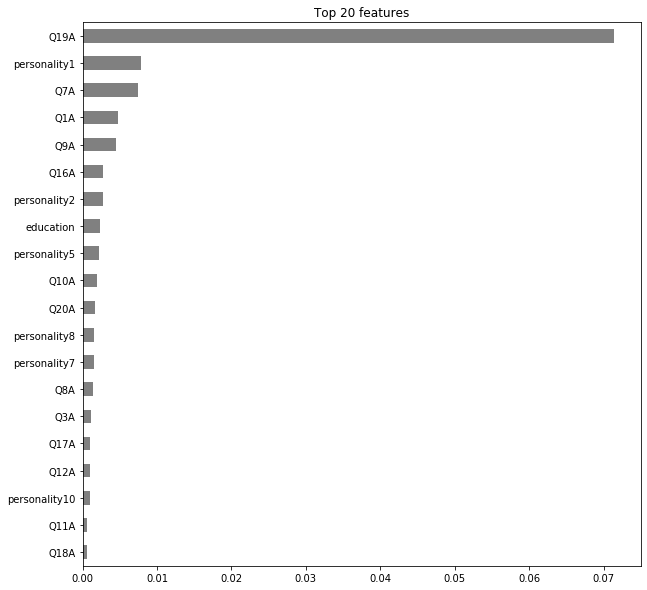

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

feature_names = X_val.columns.tolist()
permuter_importances = pd.Series(permuter.feature_importances_, feature_names).sort_values()

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
permuter_importances.sort_values()[-n:].plot.barh(color='grey');

In [18]:
eli5.show_weights(permuter, top=None, feature_names=X_val.columns.tolist())

Weight,Feature
0.0714 ± 0.0039,Q19A
0.0079 ± 0.0039,personality1
0.0075 ± 0.0025,Q7A
0.0048 ± 0.0015,Q1A
0.0044 ± 0.0050,Q9A
0.0028 ± 0.0033,Q16A
0.0028 ± 0.0014,personality2
0.0024 ± 0.0036,education
0.0023 ± 0.0010,personality5
0.0019 ± 0.0026,Q10A


In [19]:
labels = ["Never tell anyone the real reason you did something unless it is useful to do so.",
            "The best way to handle people is to tell them what they want to hear.",
            "One should take action only when sure it is morally right.",
            "Most people are basically good and kind.",
             "It is safest to assume that all people have a vicious streak and it will come out when they are given a chance.",
             "Honesty is the best policy in all cases.",
             "There is no excuse for lying to someone else.",
             "Generally speaking, people won't work hard unless they're forced to do so.",
             "All in all, it is better to be humble and honest than to be important and dishonest.",
             "When you ask someone to do something for you, it is best to give the real reasons for wanting it rather than giving reasons which carry more weight.",
             "Most people who get ahead in the world lead clean, moral lives.",
             "Anyone who completely trusts anyone else is asking for trouble.",
             "The biggest difference between most criminals and other people is that the criminals are stupid enough to get caught.",
             "Most people are brave.",
             "It is wise to flatter important people.",
             "It is possible to be good in all respects.",
             "P.T. Barnum was wrong when he said that there's a sucker born every minute.",
             "It is hard to get ahead without cutting corners here and there.",
             "People suffering from incurable diseases should have the choice of being put painlessly to death.",
             "Most people forget more easily the death of their parents than the loss of their property.",
             "Education Level",
             "Gender Identity",
             "Personality: extraverted_enthusiastic", 
             "Personality: critical_quarrelsome", 
             "Personality: dependable_selfdisciplined", 
             "Personality: anxious_easily_upset", 
             "Personality: open_to_new_experiences_complex", 
             "Personality: reserved_quiet", 
             "Personality: sympathetic_warm", 
             "Personality: disorganized_careless", 
             "Personality: calm_emotionally_stable",
             "Personality: conventional_uncreative"]

In [20]:
eli5.show_weights(permuter, top=None, feature_names=labels)

Weight,Feature
0.0714 ± 0.0039,People suffering from incurable diseases should have the choice of being put painlessly to death.
0.0079 ± 0.0039,Personality: extraverted_enthusiastic
0.0075 ± 0.0025,There is no excuse for lying to someone else.
0.0048 ± 0.0015,Never tell anyone the real reason you did something unless it is useful to do so.
0.0044 ± 0.0050,"All in all, it is better to be humble and honest than to be important and dishonest."
0.0028 ± 0.0033,It is possible to be good in all respects.
0.0028 ± 0.0014,Personality: critical_quarrelsome
0.0024 ± 0.0036,Education Level
0.0023 ± 0.0010,Personality: open_to_new_experiences_complex
0.0019 ± 0.0026,"When you ask someone to do something for you, it is best to give the real reasons for wanting it rather than giving reasons which carry more weight."


In [21]:
# get rid of features that have an importance less than zero

minimum_importance = 0
mask = permuter.feature_importances_ > minimum_importance
features = X_train.columns[mask]
X_train = X_train[features]
X_val = X_val[features]
X_test = X_test[features]

In [22]:
# run new data without harmful features through the model

import plotly.express as px
from sklearn.pipeline import make_pipeline


rf = RandomForestClassifier(n_estimators=100, 
                           random_state=42, 
                           n_jobs=-1, 
                           max_depth=10)  


rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [23]:
print('Train Accuracy', rf.score(X_train, y_train))
print('Validation Accuracy', rf.score(X_val, y_val))

# FINAL TEST ACCURACY
print('Test Accuracy', rf.score(X_test, y_test))

Train Accuracy 0.738692232055064
Validation Accuracy 0.673778389538885
Test Accuracy 0.6664044059795436


### Visualizations

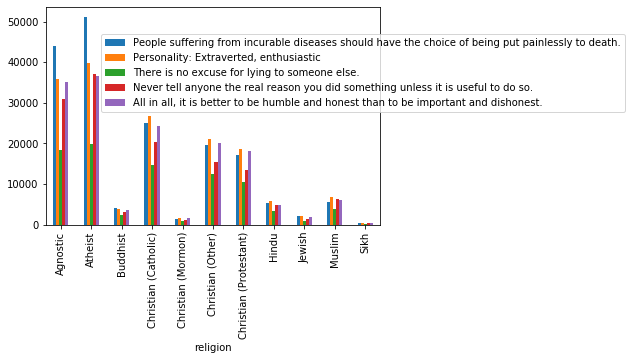

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt

new = train_selected[['Q19A', 'personality1', 'Q7A', 'Q1A','Q9A','religion']]
new = new.rename(columns={'Q19A':"People suffering from incurable diseases should have the choice of being put painlessly to death.",
                            'personality1':"Personality: Extraverted, enthusiastic", 
                            'Q7A':"There is no excuse for lying to someone else.", 
                            'Q1A': "Never tell anyone the real reason you did something unless it is useful to do so.",
                            'Q9A': "All in all, it is better to be humble and honest than to be important and dishonest."})
answers = new.groupby('religion').sum()
by_religion = answers.plot(kind='bar')
plt.legend(bbox_to_anchor=(.15, 0.9))#, bbox_transform=ax.transAxes)
plt.rcParams['figure.dpi'] = 600
plt.show();

fig = by_religion.get_figure()
fig.savefig('religion.png')

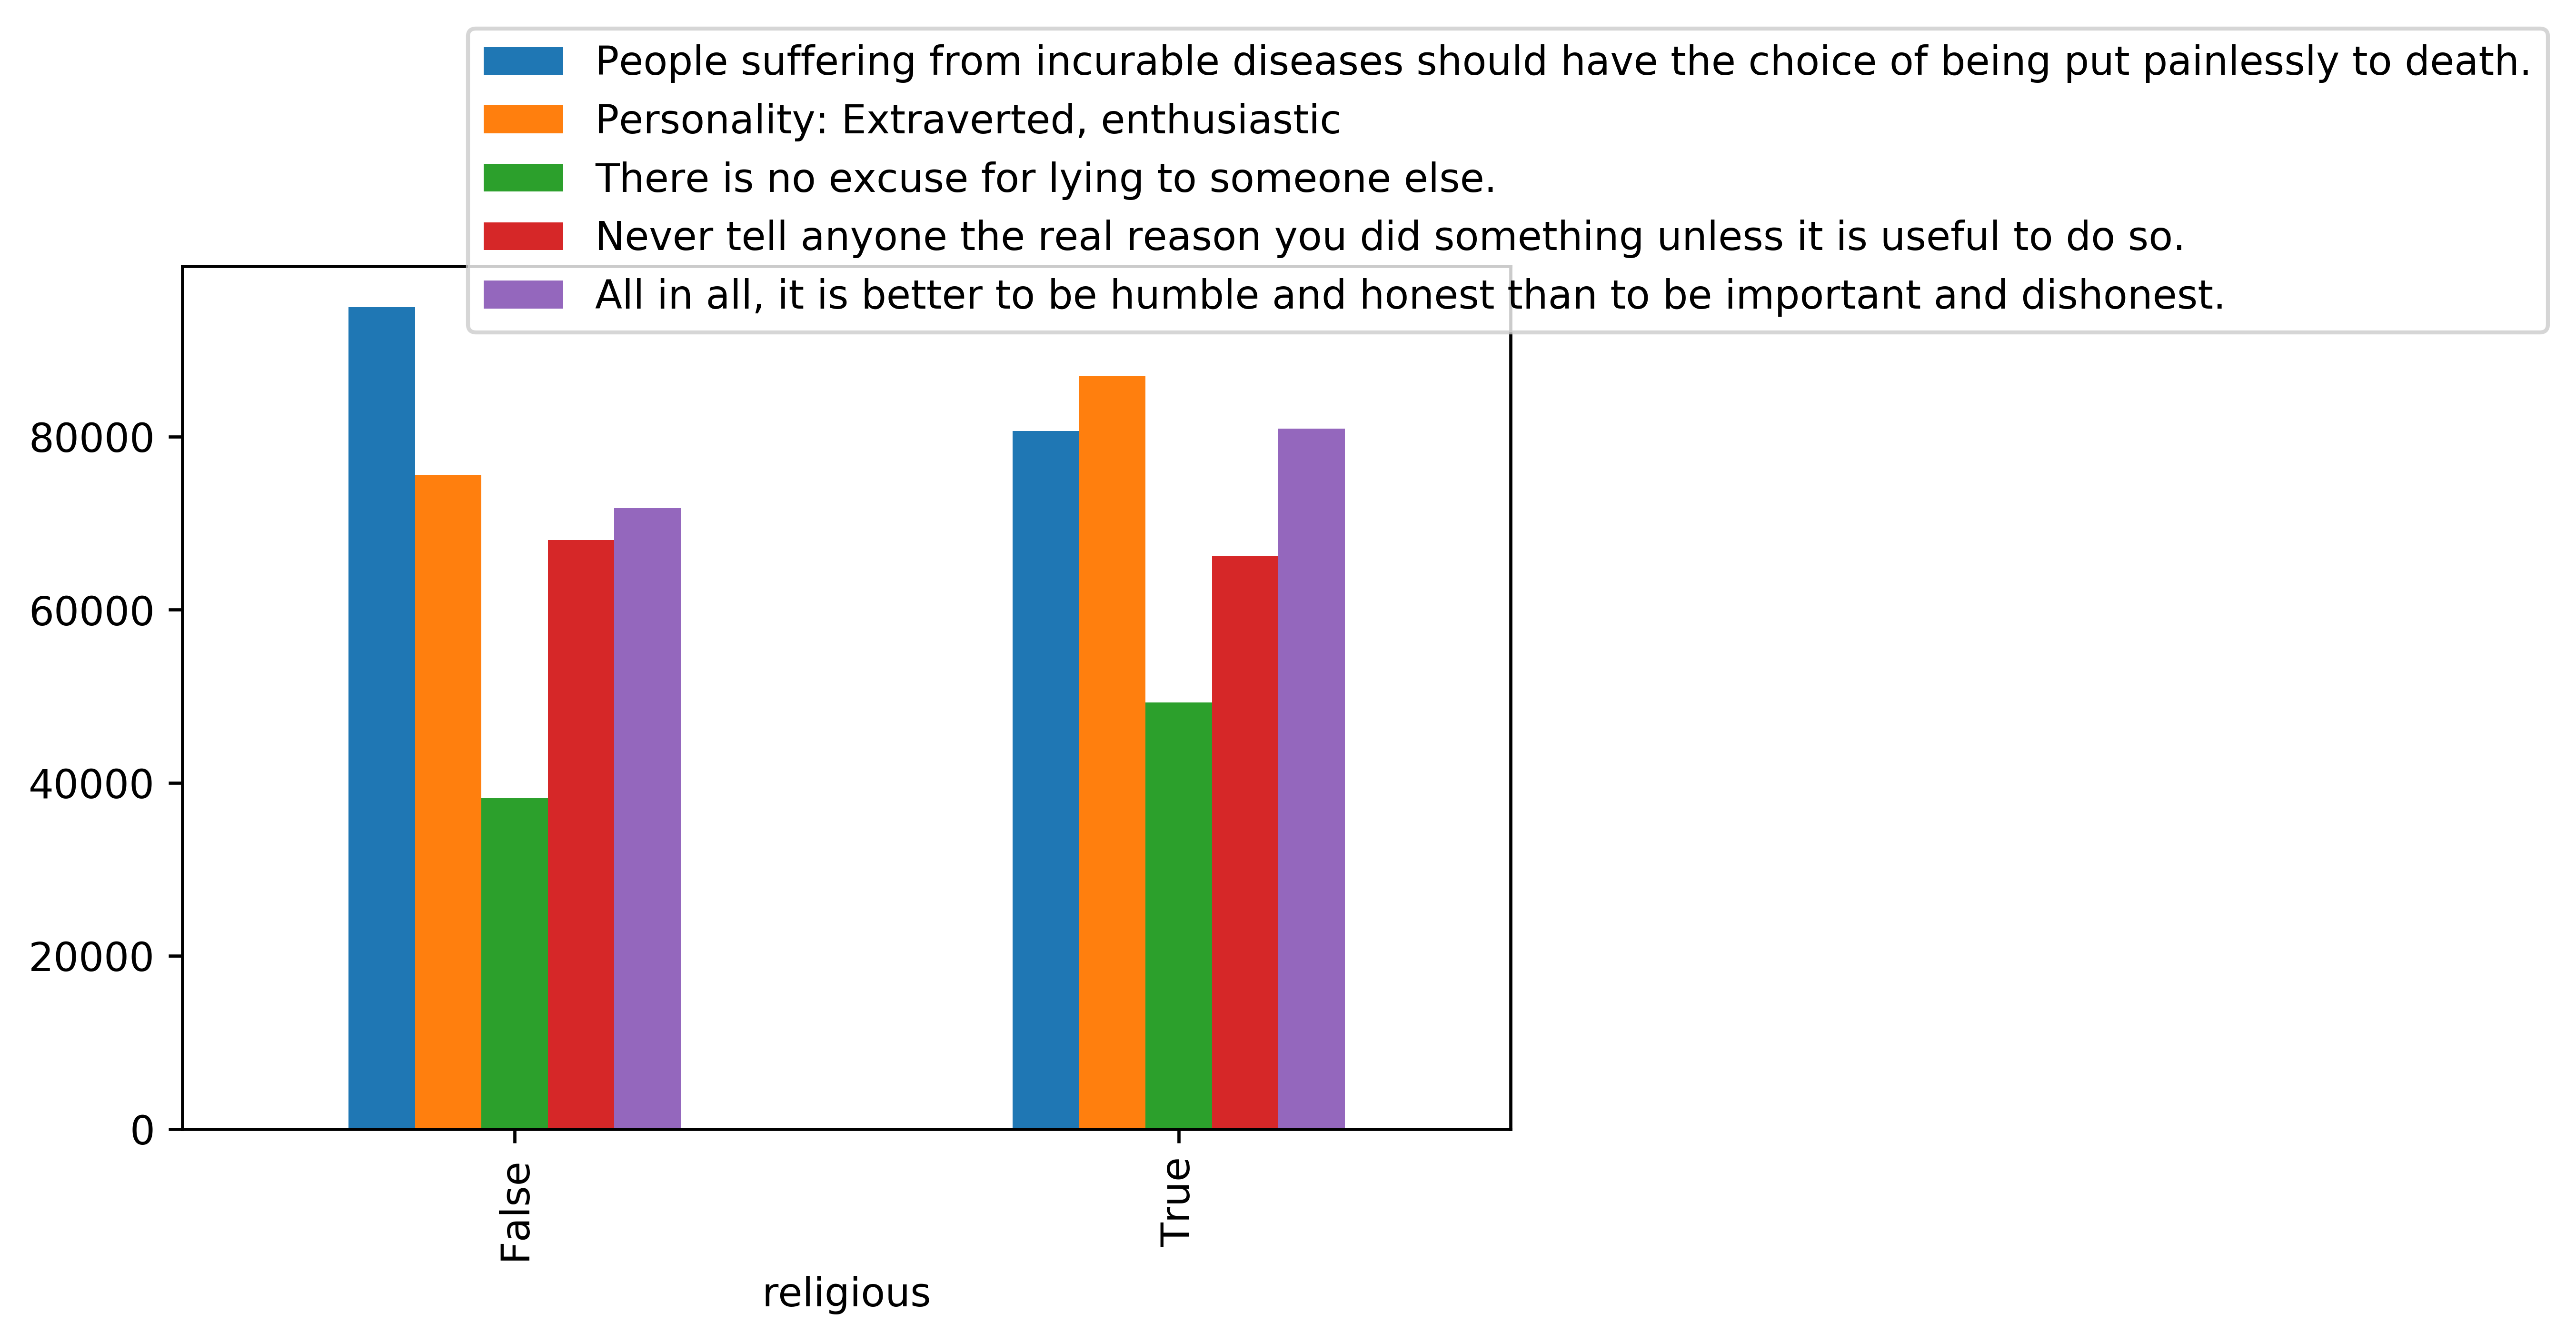

In [44]:
new = train_selected[['Q19A', 'personality1', 'Q7A', 'Q1A','Q9A','religious']]
new = new.rename(columns={'Q19A':"People suffering from incurable diseases should have the choice of being put painlessly to death.",
                            'personality1':"Personality: Extraverted, enthusiastic", 
                            'Q7A':"There is no excuse for lying to someone else.", 
                            'Q1A': "Never tell anyone the real reason you did something unless it is useful to do so.",
                            'Q9A': "All in all, it is better to be humble and honest than to be important and dishonest."})
answers = new.groupby('religious').sum()
by_religion = answers.plot(kind='bar')
plt.legend(bbox_to_anchor=(.2, 0.9))#, bbox_transform=ax.transAxes)
plt.rcParams['figure.dpi'] = 600
plt.show();

fig = by_religion.get_figure()
fig.savefig('religious.png')

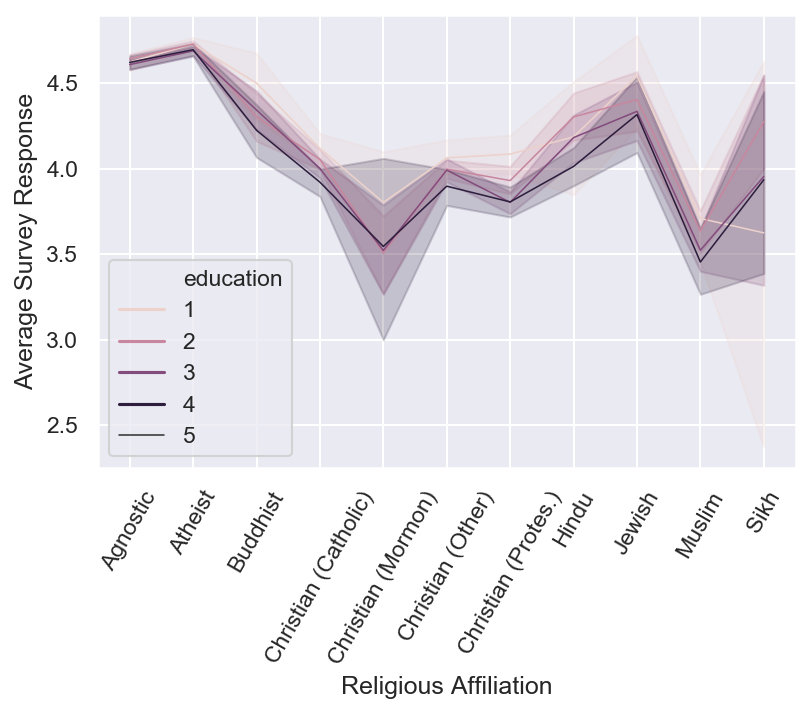

In [35]:
import seaborn as sns
sns.set(style="darkgrid")

sub = train_selected[['Q19A', 'education','religion']]

# Plot the responses for different events and regions
by_education = sns.lineplot(x='religion', y='Q19A',
            hue="education",
            data=sub,
            legend='full',
            size=5)
by_education.set_xticklabels(['Agnostic','Atheist','Buddhist','Christian (Catholic)',
                              'Christian (Mormon)', 'Christian (Other)', 'Christian (Protes.)',
                              'Hindu', 'Jewish', 'Muslim', 'Sikh'], rotation=60)
by_education.set(xlabel='Religious Affiliation', ylabel="Average Survey Response")
plt.rcParams['figure.dpi'] = 150

fig = by_education.get_figure()
fig.savefig('Q19_by_education') 


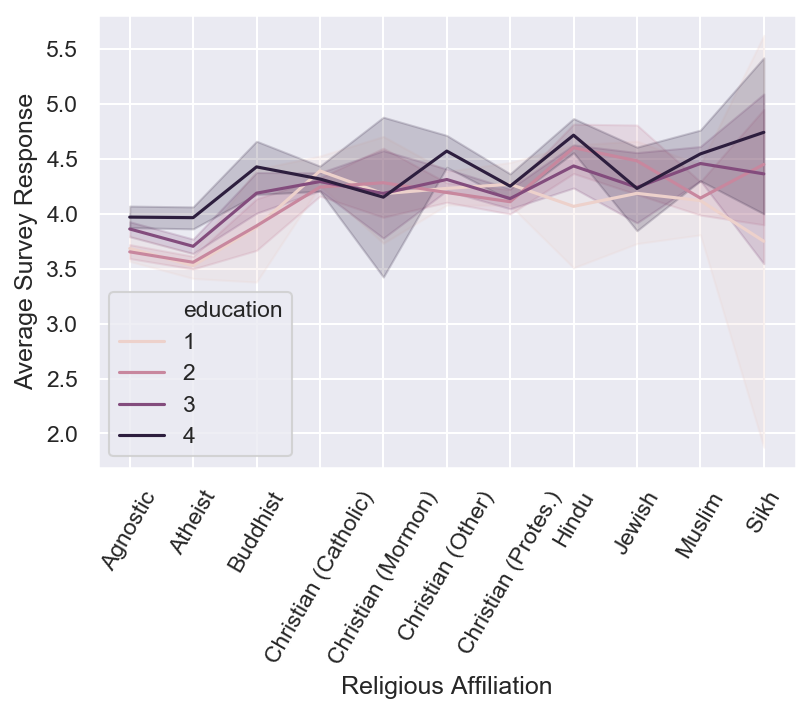

In [34]:
sub = train_selected[['personality1', 'education','religion']]

# Plot the responses for different events and regions
by_education = sns.lineplot(x='religion', y='personality1',
            hue="education",
            data=sub,
            legend='full')
by_education.set_xticklabels(['Agnostic','Atheist','Buddhist','Christian (Catholic)',
                              'Christian (Mormon)', 'Christian (Other)', 'Christian (Protes.)',
                              'Hindu', 'Jewish', 'Muslim', 'Sikh'], rotation=60)
by_education.set(xlabel='Religious Affiliation', ylabel="Average Survey Response")

fig = by_education.get_figure()
plt.rcParams['figure.dpi'] = 150
fig.savefig('personality1_by_education') 



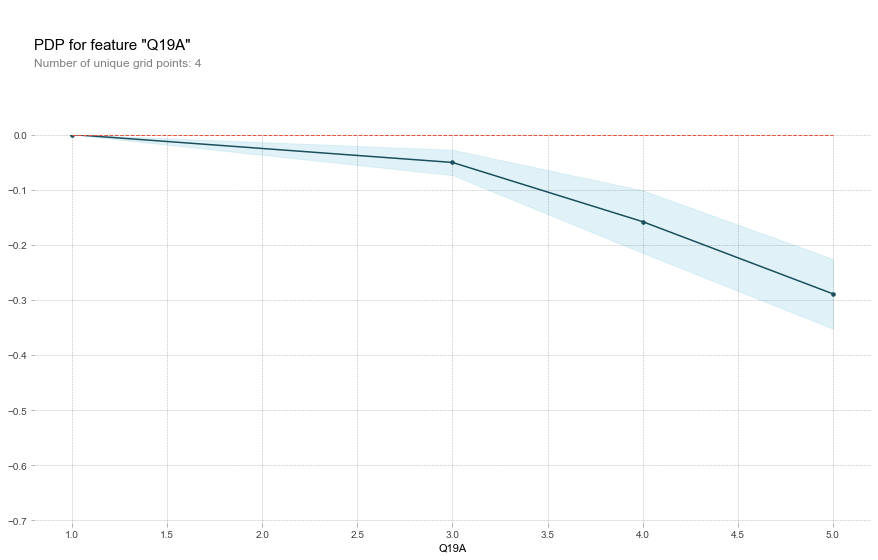

In [27]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'Q19A'

isolated = pdp_isolate(
    model = rf,
    dataset=X_train,
    model_features=X_train.columns,
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

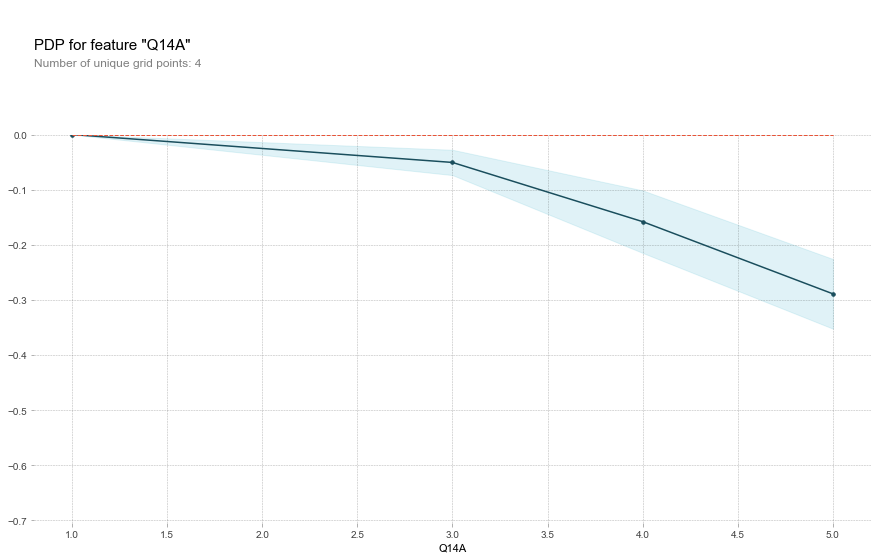

In [29]:
feature = 'Q14A'

pdp_plot(isolated, feature_name=feature);

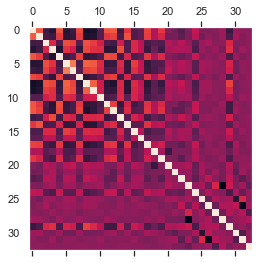

In [40]:
plt.matshow(train_selected.corr());

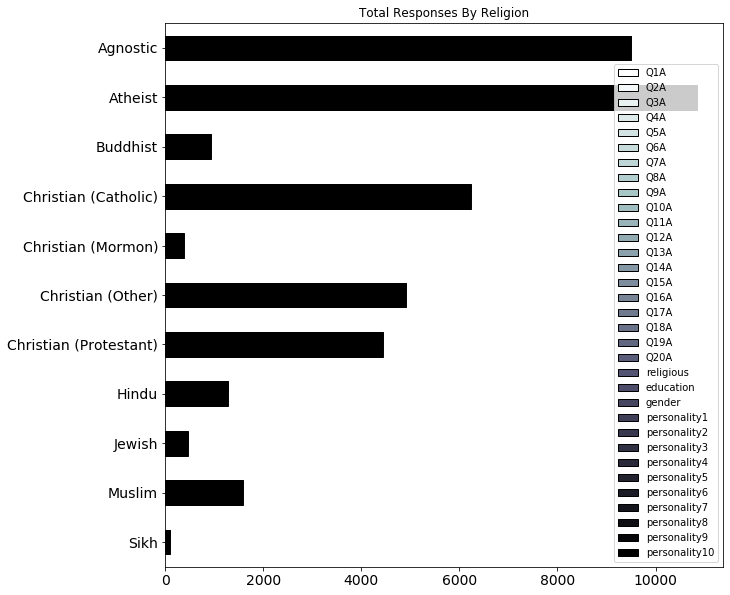

In [42]:
religion_group.sort_index(ascending=False).plot(
    kind='barh',
    figsize=(10, 10),
    cmap='bone_r',
    edgecolor='black',
    fontsize=14,
    title='Total Responses By Religion',
    
    ).yaxis.label.set_visible(False)